# Resultados

Vuelco algunos de los resultados obtenidos para el analisis de modelos de scattering en volumen utilizando autoencoders convolucionales.

Levantamos los datos en formato pkl.

In [1]:
import os
import pickle

rootdir = os.getcwd()
files_paths = [paths for paths in os.listdir(rootdir) if paths.endswith('.pkl')]

cost = {}
for path in files_paths:
    with open(path, 'rb') as f:
       cost[' '.join(path.split('.')[0].split('_')[1:])] = pickle.load(f)

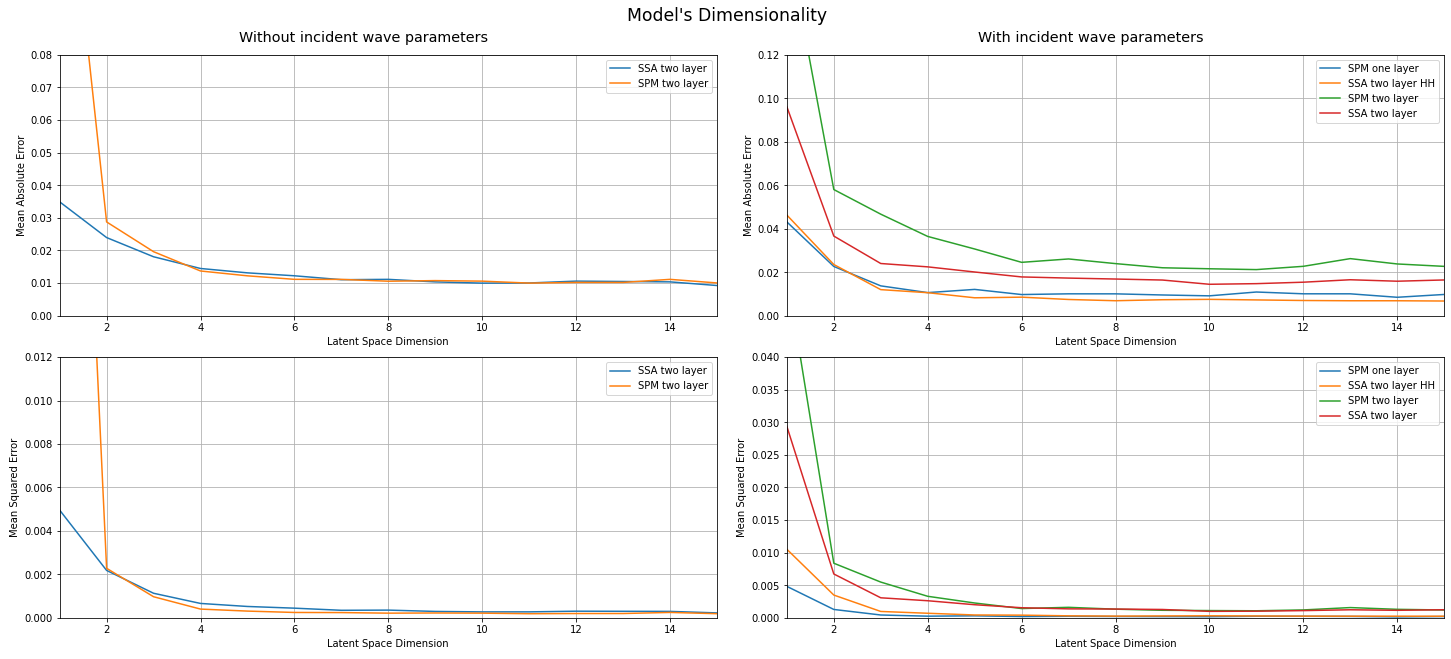

In [32]:
from matplotlib import pyplot as plt

def cost_plot(cost_function, ax, **kwargs):
    # Generate plot
    xlim = len(cost_function) + 1
    plot = ax.plot(range(1, xlim), cost_function, 
                   label = kwargs.get('label', None))

    # Axes labels
    ax.set_xlabel('Latent Space Dimension') 
    ax.set_ylabel(kwargs.get('ylabel', None))
    ax.set_title(kwargs.get('title', None))
    ax.set_xlim((1, xlim - 1))
    ax.set_ylim(kwargs.get('ylim', (0, 0.125)))
    ax.grid(b=True)
    ax.legend()
    ax.labelsize      : larger 

    return plot

# Generates figure
fig = plt.figure(constrained_layout=True, figsize=(20,9))
fig.suptitle('Model\'s Dimensionality', fontsize='xx-large')

# Divides figure in subfigures for diferent amount of parameters
sub_fig = fig.subfigures(1, 2)
left_ax = sub_fig[0].subplots(2, 1)
right_ax = sub_fig[1].subplots(2, 1)
sub_fig[0].suptitle('Without incident wave parameters', fontsize = 'x-large')
sub_fig[1].suptitle('With incident wave parameters', fontsize = 'x-large')

# Plot Cost functions for different metrics
for key in cost.keys():
    if 'ngi' in key:
        image_mae = cost[key]['MAE'][1]
        image_mse = cost[key]['MSE'][1]
        cost_plot(image_mae, left_ax[0], label = key[:-4], 
                  ylabel = 'Mean Absolute Error', ylim = (0, 0.08))
        cost_plot(image_mse, left_ax[1], label = key[:-4],
                  ylabel = 'Mean Squared Error', ylim = (0, 0.012))
    else:
        image_mae = cost[key]['MAE'][1]
        image_mse = cost[key]['MSE'][1]
        cost_plot(image_mae, right_ax[0], label = key, 
                  ylabel = 'Mean Absolute Error', ylim = (0, 0.12))
        cost_plot(image_mse, right_ax[1], label = key,
                  ylabel = 'Mean Squared Error', ylim = (0, 0.04)) 

plt.savefig(os.path.join(os.getcwd(), 'cost_comparation.png')) 
plt.show()

In [31]:
fig.__dict__
os.path.join(os.getcwd(), 'cost_comparation.png')

'/home/jotavecorta/proyectos/tesis/src/results/cost_comparation.png'